# Matriz de Adyacencia

La matriz de adyacencia presentada establece los países los principales destinos de exportación de cada país (no refiere a todas las exportaciones posibles). A continuación, adjutamos dicha matriz de adyacencia:

In [119]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/1X4tP3Oj72yuZdqc4oqwjRW_7cwOWlsIiXNYm6GLJrvA/edit?usp=sharing", width = 1500, height = 800)

In [121]:
# reading in
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/1X4tP3Oj72yuZdqc4oqwjRW_7cwOWlsIiXNYm6GLJrvA/export?format=csv"
FigueData = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

In [123]:
FigueData.head()

,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Liberia,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur,CONCENTRACION
Países,,,,,,,,,,,,,,,,,,,,,
Estados_Unidos,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.06
Canada,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.50
Mexico,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.54
Union_Europea,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.06
China,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.05


In [125]:
FigueData.columns

Index(['Estados_Unidos', 'Canada', 'Mexico', 'Union_Europea', 'China', 'Japon',
       'Republica_de_Corea', 'India', 'Rusia', 'Reino_Unido',
       ...
       'Liberia', 'Libia', 'Macedonia_del_Norte', 'Marruecos', 'Vietnam',
       'Zymbabwe', 'Malasia', 'Pakistan', 'Singapur', 'CONCENTRACION'],
      dtype='object', length=103)

In [127]:
varsToDrop=['CONCENTRACION']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Kuwait,Liberia,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur
Países,,,,,,,,,,,,,,,,,,,,,
Estados_Unidos,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mexico,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Union_Europea,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
China,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zymbabwe,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Malasia,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Grafos

A partir de la red de exportación de los presentes países, realizamos un grafo que nos permite visualizar la relación entre los nodos.

In [169]:
import networkx as nx
TradeNet = nx.from_pandas_adjacency(adjacency)

In [171]:
TradeNet.remove_edges_from(nx.selfloop_edges(TradeNet))

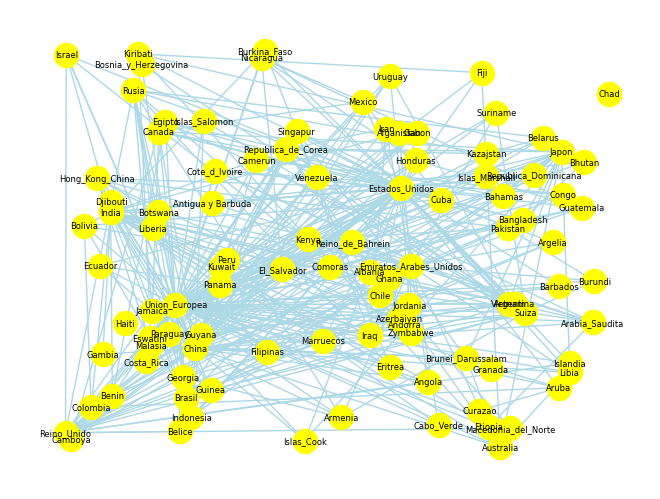

In [179]:
# re plot
nx.draw_random(TradeNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=6)

# Características básicas

In [181]:
type(TradeNet)

networkx.classes.graph.Graph

In [143]:
len(TradeNet.nodes),len(TradeNet.edges)

(102, 364)

**Análisis:** Dentro del presente grafo hay 102 nodos y 364 aristas (edges)

## Conectividad

In [145]:
# is connected
nx.is_connected(TradeNet)

False

In [147]:
# how many CC?
len(list(nx.connected_components(TradeNet)))

6

In [149]:
# how many in each?
[len(c) for c in sorted(nx.connected_components(TradeNet), key=len, reverse=True)]

[97, 1, 1, 1, 1, 1]

In [151]:
# any isolates?
list(nx.isolates(TradeNet))

['Chad', 'Granada', 'Haiti', 'Islas_Marshall', 'Liberia']

**Análisis:** Resulta que no todos los nodos están conectados, las excepciones a la regla serían los países Chad, Granada, Haití, Las Islas Marshall y Liberia.

## Distancia

In [153]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(TradeNet), key=len)
TradeNet_largest=TradeNet.subgraph(largest_cc_nodes)

nx.diameter(TradeNet_largest)

4

**Análisis:** El resultado refiere a que la distancia más larga entre dos nodos del componente más grande son de 4 aristas.

### Geodesics

In [90]:
# geodesics 
geodesics = dict(nx.all_pairs_shortest_path_length(TradeNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in TradeNet.nodes] for n in TradeNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=TradeNet.nodes, columns=TradeNet.nodes)

# we get
MatrixGeo_DF

,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Kuwait,Liberia,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur
Estados_Unidos,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,NaN,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0
Canada,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
Mexico,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
Union_Europea,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
China,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,NaN,2.0,2.0,2.0,0.0,2.0,2.0,3.0,2.0
Zymbabwe,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,NaN,2.0,2.0,2.0,2.0,0.0,2.0,3.0,2.0
Malasia,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,NaN,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0
Pakistan,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,...,3.0,NaN,3.0,3.0,3.0,3.0,3.0,2.0,0.0,1.0


In [155]:
# a frequency table of the geodesics
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,102.0
1.0,728.0
2.0,7308.0
3.0,1246.0
4.0,30.0
NaN,990.0


**Análisis:** Se explica que la mayoría de los pares de nodos en el grafo están separados por dos pasos o enlaces, lo cual sugiere que el grafo tiene una conectividad relativamente buena y la mayoría de los nodos se pueden alcanzar con pocas intermediaciones.

In [157]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21444\3592291340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})


,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Kuwait,Liberia,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur
Estados_Unidos,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Canada,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Mexico,1,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Union_Europea,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
China,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,1,1,1,1
Zymbabwe,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1
Malasia,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
Pakistan,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1


Esto nos permite obseervaar si los nodos son alcanzados por otros nodos.

### Conectabilidad (conectedness)

In [159]:
# connectedness
nNodes=len(TradeNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

0.9039021549213745

**Análisis:** Hay un alto grado de conectividad demostrada con un 90.4% de nodos conectados directa o indirectamente.

In [106]:
# geodesics 
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(TradeNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in TradeNet_largest.nodes] for n in TradeNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=TradeNet_largest.nodes, columns=TradeNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Kiribati,Kuwait,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur
Estados_Unidos,0,1,1,1,1,1,1,1,2,1,...,1,2,1,2,1,1,2,1,2,1
Canada,1,0,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,3,2
Mexico,1,1,0,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,3,2
Union_Europea,1,1,1,0,1,1,1,1,1,1,...,2,2,1,1,1,1,1,1,2,1
China,1,1,1,1,0,1,1,1,1,1,...,2,1,1,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,2,2,1,1,1,1,2,2,2,...,2,2,2,2,2,0,2,2,3,2
Zymbabwe,2,2,2,1,2,2,2,1,2,2,...,3,2,2,2,2,2,0,2,3,2
Malasia,1,2,2,1,1,2,2,2,2,2,...,1,2,2,2,2,2,2,0,2,1
Pakistan,2,3,3,2,2,3,3,2,3,2,...,3,3,3,3,3,3,3,2,0,1


### Alcanzabilidad (reachability)

In [238]:
# reachability
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21444\3088296543.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})


,Estados_Unidos,Canada,Mexico,Union_Europea,China,Japon,Republica_de_Corea,India,Rusia,Reino_Unido,...,Kiribati,Kuwait,Libia,Macedonia_del_Norte,Marruecos,Vietnam,Zymbabwe,Malasia,Pakistan,Singapur
Estados_Unidos,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Canada,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mexico,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Union_Europea,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
China,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Zymbabwe,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Malasia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
Pakistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


Vemos que tan alcanzable son los nodos presentados.

In [110]:
# connectedness
nNodes=len(TradeNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

1.0

**Análisis**: Teniendo en cuenta de que el reachibility es 1, se determina que el alcance de un nodo específico a otro es muy bajo o simplemente no se encuentra conectado (se conecta sólo consigo mismo).

## Densidad

In [112]:
# for our case:
nx.density(TradeNet_largest)

0.0781786941580756

**Análisis:** La red presentada posee un densidad baja debido a que la gran mayoría de sus elementos están interconectados con un grupo específico de países. No obstante, estos grupos rara vez se encuentran interconectados, lo que merma la densidad de la red.

## Centralidad del nodo

In [114]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(TradeNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(TradeNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(TradeNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,Degree,Closeness,Betweenness
Estados_Unidos,0.552083,0.685714,0.175905
Canada,0.093750,0.513369,0.001350
Mexico,0.062500,0.507937,0.001209
Union_Europea,0.854167,0.872727,0.526711
China,0.468750,0.644295,0.113643
...,...,...,...
Vietnam,0.072917,0.507937,0.000746
Zymbabwe,0.052083,0.492308,0.010338
Malasia,0.083333,0.513369,0.004024
Pakistan,0.041667,0.359551,0.000534


**Análisis:**
- En la base presentada, se encuentran países clave que poseen un betweenness alto, tales como EEUU, China y la Unión Europea. En tal sentido, dichos países se emplean como puente de conexión para que países que poseen relaciones de exportación más cerradas geográficamente hablando (solo con su región) puedan interrelacionarse con otras zonas de la misma forma. Por ejemplo Iraq y Singapur mediante la Unión Europea
- Casos como México refieren a un alto Degree, pero un bajo Betweenness. Esto indica que si bien tiene varias conexiones directas, estas no son importantes para su conexión con otros nodos.

### Representación final

NameError: name 'actorMeasures' is not defined

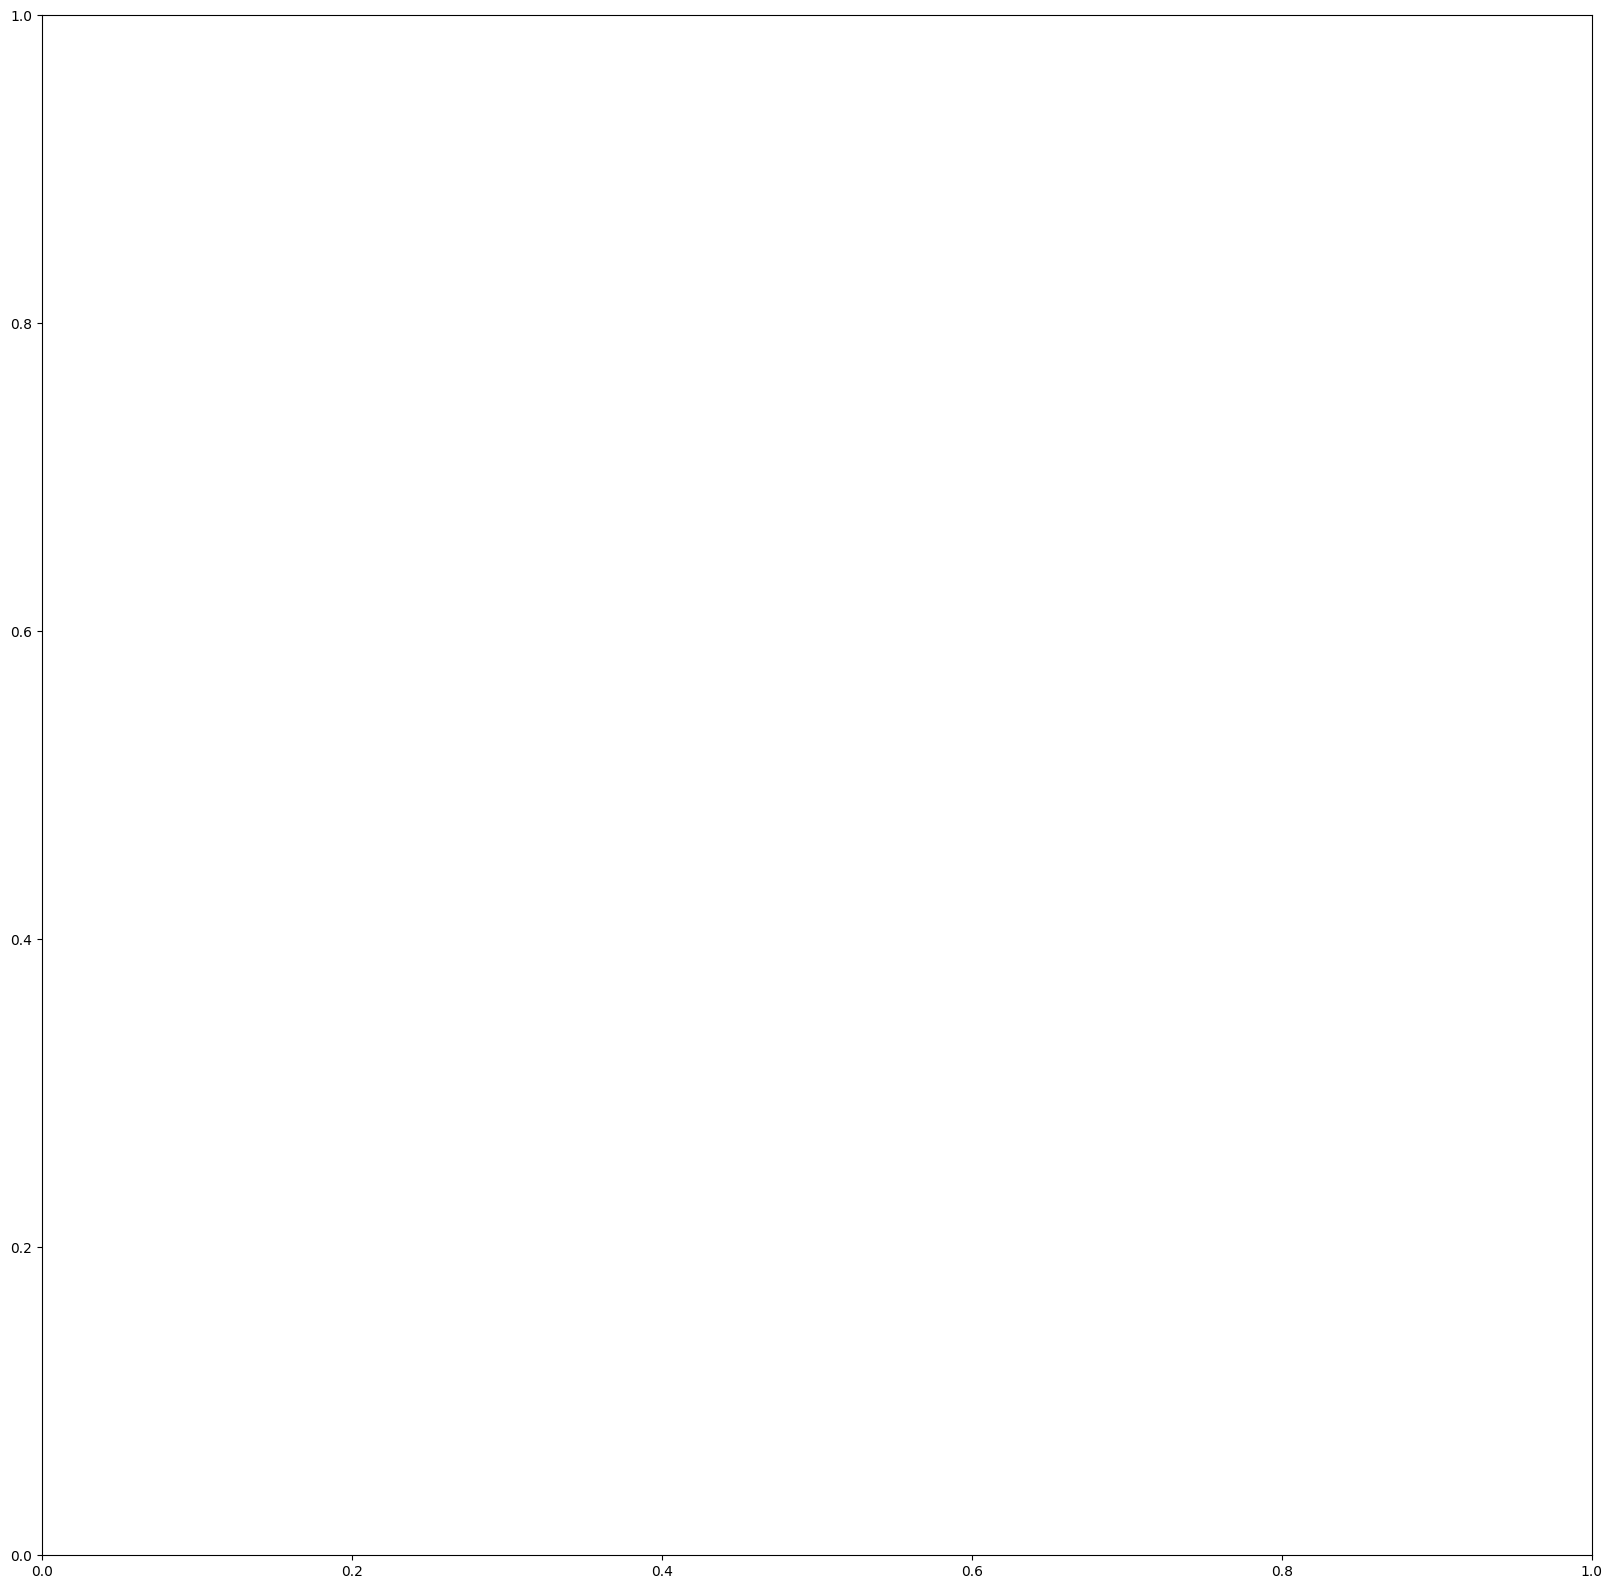

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

# RESULTADOS:

Se puede apreciar que los casos con mayor influencia dentro de la red son: La unión europea, Estados Unidos, China y la India, en ese orden de mayor a menor. Por otro lado, se encuentra que existen países con muy pocas conexiones dentro de la red tales como Curazao, Ghana, Gambia y Venezuela.
Se puede deducir que, en general, los casos analizados poseen mayor closeness o centralidad que degree; lo que podría explicar la rapidez de conexión a diferenciarlo de la cantidad de conexiones. La mayoría de países poseen pocas conexiones pero tienen más rapidez para llegar entre ellos.